core           INFO 	Loading data for British Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '55', '63', '44', '23', '14', '10', '27', '18', '31', '2', '77', '11', '22', '24', '21', '20']


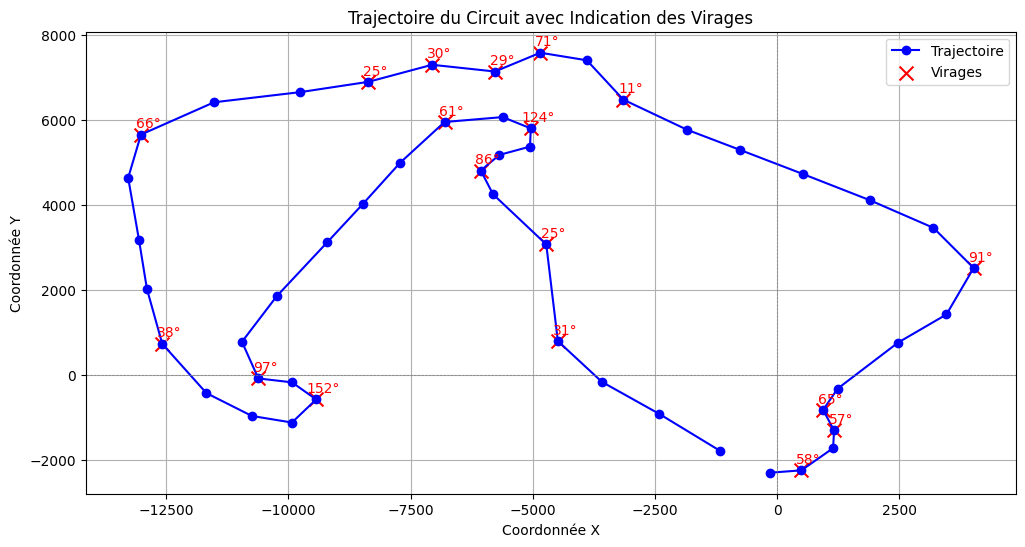

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import fastf1

# Chargement des données de session
session = fastf1.get_session(2023, 'Silverstone', 'Q')
session.load()

# Extraction de la trajectoire la plus rapide et des infos du circuit
lap = session.laps.pick_fastest()
pos = lap.get_pos_data()
circuit_info = session.get_circuit_info()

# Fonction pour effectuer la rotation
def rotate(xy, angle):
    rot_mat = np.array([[np.cos(angle), np.sin(angle)],
                        [-np.sin(angle), np.cos(angle)]])
    return np.matmul(xy, rot_mat)

In [ ]:
# Obtenir les coordonnées de la trajectoire
track = pos[['X', 'Y']].to_numpy()
track_angle = circuit_info.rotation * np.pi / 180  # Angle en radians
rotated_track = rotate(track, angle=track_angle)
track_coordinate = pd.DataFrame(rotated_track, columns=['X', 'Y'])

# Réduction du nombre de points à 50
n_lignes_souhaitees = 50
pas = len(track_coordinate) / n_lignes_souhaitees
indices = np.unique(np.round(np.arange(0, len(track_coordinate), pas)).astype(int))
df_reduit = track_coordinate.iloc[indices].reset_index(drop=True)

# Charger les données des virages et extraire les informations pour le Grand Prix de Silverstone
df_trun = pd.read_csv('f1_corners_analysis_2023.csv')
df_corners = df_trun[df_trun['Grand Prix'] == 'FORMULA 1 ARAMCO BRITISH GRAND PRIX 2023']

# Associer l'angle du virage au point le plus proche dans df_reduit
for _, row in df_corners.iterrows():
    corner = np.array([[round(row['X']), round(row['Y'])]]).reshape(1, 2)
    corner_rotated = rotate(corner, angle=track_angle).flatten()
    
    distances = np.sqrt((df_reduit['X'] - corner_rotated[0]) ** 2 + (df_reduit['Y'] - corner_rotated[1]) ** 2)
    closest_index = np.argmin(distances)
    df_reduit.loc[closest_index, 'Angle'] = row['Angle']

# Affichage du tracé de la trajectoire avec les zones de virage
plt.figure(figsize=(12, 6))

# Tracé de la trajectoire générale
plt.plot(df_reduit['X'], df_reduit['Y'], marker='o', linestyle='-', color='b', label="Trajectoire")

# Tracé des virages avec un style distinct
virages = df_reduit.dropna(subset=['Angle'])
plt.scatter(virages['X'], virages['Y'], color='red', marker='x', s=100, label="Virages")

# Annotation des angles pour chaque virage
for i, row in virages.iterrows():
    plt.annotate(f"{int(row['Angle'])}°", (row['X'], row['Y']), textcoords="offset points", xytext=(5,5), ha='center', color='red')

# Personnalisation du plot
plt.title('Trajectoire du Circuit avec Indication des Virages')
plt.xlabel('Coordonnée X')
plt.ylabel('Coordonnée Y')
plt.grid()
plt.axhline(0, color='grey', lw=0.5, ls='--')
plt.axvline(0, color='grey', lw=0.5, ls='--')
plt.legend()
plt.show()

# Section for all track create the base dataset

In [116]:
# Charger les circuits de la saison
season_year = 2023
Dataset = pd.DataFrame()
schedule = fastf1.get_event_schedule(2023)

# Boucle sur les numéros de Grand Prix
# for gp_number in range(1, len(schedule)):  # On commence à 1 et on s'arrête avant 23
for gp_number in range(1, 2):  # On commence à 1 et on s'arrête avant 23

    try:
        # Charger les données de la session de qualification pour chaque Grand Prix
        session = fastf1.get_session(season_year, gp_number, 'Q')
        session.load()
        
        lap = session.laps.pick_fastest()
        pos = lap.get_pos_data()
        circuit_info = session.get_circuit_info()
        
        corner_df = circuit_info.corners[['X', 'Y', 'Number']]
        corner_df['Angle'] = None

        # Obtenir les coordonnées de la trajectoire
        track = pos[['X', 'Y']].to_numpy()
        track_angle = circuit_info.rotation * np.pi / 180  # Angle en radians
        rotated_track = rotate(track, angle=track_angle)
        track_coordinate = pd.DataFrame(rotated_track, columns=['X', 'Y'])

        # Obtenir les coordonnées de la trajectoire
        track = pos[['X', 'Y']].to_numpy()
        track_angle = circuit_info.rotation * np.pi / 180  # Angle en radians
        rotated_track = rotate(track, angle=track_angle)
        track_coordinate = pd.DataFrame(rotated_track, columns=['X', 'Y'])


    except Exception as e:
        print(f"Erreur rencontrée pour le Grand Prix numéro {gp_number}: {e}")
        break  # Arrêter la boucle en cas d'erreur

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '55', '14', '63', '44', '18', '31', '27', '4', '77', '24', '22', '23', '2', '20', '81', '21', '10']
/tmp/ipykernel_19464/2381428692.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [117]:
# Charger les circuits de la saison
season_year = 2023
Dataset = pd.DataFrame()
schedule = fastf1.get_event_schedule(2023)

# Boucle sur les numéros de Grand Prix
for gp_number in range(1, len(schedule)):  # On commence à 1 et on s'arrête avant 23
    try:
        # Charger les données de la session de qualification pour chaque Grand Prix
        session = fastf1.get_session(season_year, gp_number, 'Q')
        session.load()
        
        lap = session.laps.pick_fastest()
        pos = lap.get_pos_data()
        circuit_info = session.get_circuit_info()
        
        corner_df = circuit_info.corners[['X', 'Y', 'Number']]
        corner_df['Angle'] = None

        # Obtenir les coordonnées de la trajectoire
        track = pos[['X', 'Y']].to_numpy()
        track_angle = circuit_info.rotation * np.pi / 180  # Angle en radians
        rotated_track = rotate(track, angle=track_angle)
        track_coordinate = pd.DataFrame(rotated_track, columns=['X', 'Y'])

        # Réduction du nombre de points à 50
        n_lignes_souhaitees = 50
        pas = len(track_coordinate) / n_lignes_souhaitees
        indices = np.unique(np.round(np.arange(0, len(track_coordinate), pas)).astype(int))
        df_reduit = track_coordinate.iloc[indices].reset_index(drop=True)

        # Charger les données des virages et extraire les informations pour le Grand Prix de Silverstone
        df_trun = pd.read_csv('f1_corners_analysis_2023.csv')
        df_corners = df_trun[df_trun['Grand Prix'] == schedule.loc[i, 'EventName']]

        # Associer l'angle du virage au point le plus proche dans df_reduit
        for _, row in df_corners.iterrows():
            corner = np.array([[round(row['X']), round(row['Y'])]]).reshape(1, 2)
            corner_rotated = rotate(corner, angle=track_angle).flatten() 
            distances = np.sqrt((df_reduit['X'] - corner_rotated[0]) ** 2 + (df_reduit['Y'] - corner_rotated[1]) ** 2)
            closest_index = np.argmin(distances)
            df_reduit.loc[closest_index, 'Angle'] = row['Angle']

        # Affichage du tracé de la trajectoire avec les zones de virage
        plt.figure(figsize=(12, 6))

        # Tracé de la trajectoire générale
        plt.plot(df_reduit['X'], df_reduit['Y'], marker='o', linestyle='-', color='b', label="Trajectoire")

        # Tracé des virages avec un style distinct
        virages = df_reduit.dropna(subset=['Angle'])
        plt.scatter(virages['X'], virages['Y'], color='red', marker='x', s=100, label="Virages")

        # Annotation des angles pour chaque virage
        for i, row in virages.iterrows():
            plt.annotate(f"{int(row['Angle'])}°", (row['X'], row['Y']), textcoords="offset points", xytext=(5,5), ha='center', color='red')

        # Personnalisation du plot
        plt.title('Trajectoire du Circuit avec Indication des Virages')
        plt.xlabel('Coordonnée X')
        plt.ylabel('Coordonnée Y')
        plt.grid()
        plt.axhline(0, color='grey', lw=0.5, ls='--')
        plt.axvline(0, color='grey', lw=0.5, ls='--')
        plt.legend()
        plt.show()

    except Exception as e:
        print(f"Erreur rencontrée pour le Grand Prix numéro {gp_number}: {e}")
        break  # Arrêter la boucle en cas d'erreur

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.4.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '16', '55', '14', '63', '44', '18', '31', '27', '4', '77', '24', '22', '23', '2', '20', '81', '21', '10']


Erreur rencontrée pour le Grand Prix numéro 1: 48


/tmp/ipykernel_19464/1419648658.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corner_df['Angle'] = None
